# Traffic Accidents in Belgrade, Serbia, 2018

1. Traffic accidents by month / weekdays
2. Traffic accidents by damage type
3. Heatmap of Traffic Accidents sorted by Months and Weekdays
4. Monthly Heatmap of Traffic Accidents By Damage Type
5. Accident types

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import data

vehicle_incidents_serbia = pd.read_csv('/Users/markouskokovic/Downloads/jb.csv', encoding = "ISO-8859-1")
vehicle_incidents_serbia.head()

,1203537,"01.01.2018,17:50",20.46804,44.78468,Sa mat.stetom,SN SA PARKIRANIM VOZILIMA,Sudar sa parkiranim vozilom sa desne strane kolovoza
0,1203512,"01.01.2018,15:25",20.455290,44.807350,Sa mat.stetom,SN SA NAJMANjE DVA VOZILA  BEZ SKRETANjA,Najmanje dva vozila koja se kre?u u istom smer...
1,1203466,"01.01.2018,00:10",20.515090,44.813862,Sa mat.stetom,SN SA JEDNIM VOZILOM,Nezgoda sa jednim vozilom na kolovozu
2,1203518,"01.01.2018,13:20",20.388714,44.822182,Sa mat.stetom,SN SA PARKIRANIM VOZILIMA,Ostali sudari sa parkiranim vozilom
3,1203521,"01.01.2018,00:05",20.264630,44.380690,Sa mat.stetom,SN SA PARKIRANIM VOZILIMA,Sudar sa parkiranim vozilom sa leve strane kol...
4,1203625,"01.01.2018,04:30",20.408376,44.761337,Sa mat.stetom,SN SA PARKIRANIM VOZILIMA,Sudar sa parkiranim vozilom sa leve strane kol...


# Data cleaning

In [3]:
# Change the column names

vehicle_incidents_serbia.columns = ['id', 'date_time', 'longitude', 'latitude', 'damage_type', 'accident_type', 'description']

In [4]:
# Change date_time column to datetime type

vehicle_incidents_serbia.date_time = pd.to_datetime(vehicle_incidents_serbia.date_time)

In [5]:
# Make 2 new columns: 1)time 2)date

vehicle_incidents_serbia['time'], vehicle_incidents_serbia['date'] = vehicle_incidents_serbia.date_time.apply(lambda x: x.time()), vehicle_incidents_serbia.date_time.apply(lambda x: x.date())

In [6]:
# Create a weekday column

import datetime as dt

vehicle_incidents_serbia['weekday'] = vehicle_incidents_serbia.date_time.dt.weekday_name


In [7]:
vehicle_incidents_serbia['month'] = vehicle_incidents_serbia.date_time.dt.month

In [8]:
# Change the name of the values in damage_type column

vehicle_incidents_serbia = vehicle_incidents_serbia.replace({'damage_type' : {'Sa mat.stetom' : 'Physical damage no injuries', 'Sa povredjenim' : 'With injuries', 'Sa poginulim' : 'Accident with death result'}})



In [9]:
# Change dtype of description column
vehicle_incidents_serbia['description'] = vehicle_incidents_serbia.description.astype(str)


In [10]:
vehicle_incidents_serbia = vehicle_incidents_serbia.drop('description', axis='columns')
vehicle_incidents_serbia.head()



,id,date_time,longitude,latitude,damage_type,accident_type,time,date,weekday,month
0,1203512,2018-01-01 15:25:00,20.455290,44.807350,Physical damage no injuries,SN SA NAJMANjE DVA VOZILA  BEZ SKRETANjA,15:25:00,2018-01-01,Monday,1
1,1203466,2018-01-01 00:10:00,20.515090,44.813862,Physical damage no injuries,SN SA JEDNIM VOZILOM,00:10:00,2018-01-01,Monday,1
2,1203518,2018-01-01 13:20:00,20.388714,44.822182,Physical damage no injuries,SN SA PARKIRANIM VOZILIMA,13:20:00,2018-01-01,Monday,1
3,1203521,2018-01-01 00:05:00,20.264630,44.380690,Physical damage no injuries,SN SA PARKIRANIM VOZILIMA,00:05:00,2018-01-01,Monday,1
4,1203625,2018-01-01 04:30:00,20.408376,44.761337,Physical damage no injuries,SN SA PARKIRANIM VOZILIMA,04:30:00,2018-01-01,Monday,1


# 1. Traffic accidents per month \ weekday

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar

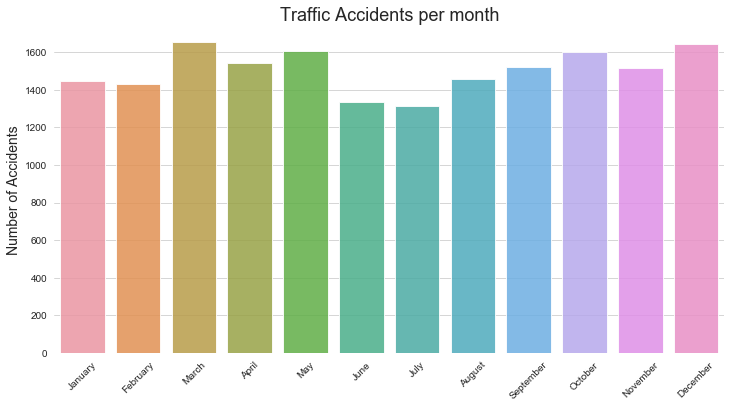

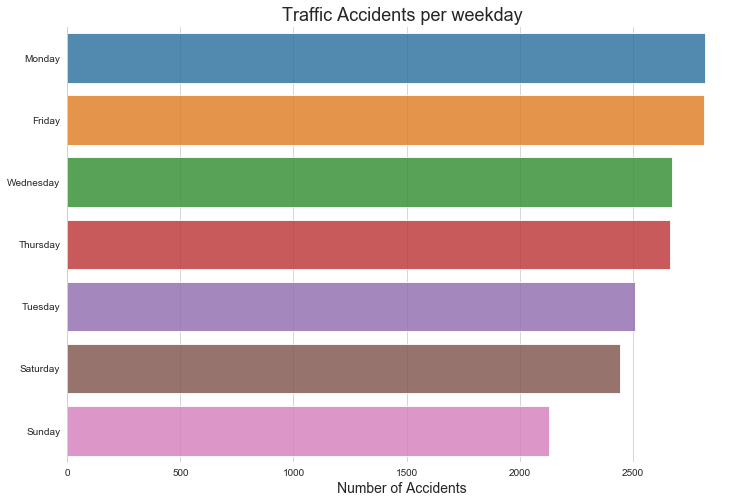

In [12]:
accidents_per_month = vehicle_incidents_serbia.month.value_counts()
accidents_per_weekday = vehicle_incidents_serbia.weekday.value_counts()

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(accidents_per_month.index, accidents_per_month.values,
           alpha=0.85)
plt.title('Traffic Accidents per month', fontsize = 18)
plt.ylabel('Number of Accidents', fontsize = 14)
plt.xticks(range(0,12), labels=calendar.month_name[1:13], rotation=45)
sns.despine(left=True, bottom=True)
plt.show()

plt.figure(figsize=(12,8))
sns.barplot(accidents_per_weekday.values, accidents_per_weekday.index,
           alpha = 0.85)
plt.title('Traffic Accidents per weekday', fontsize=18)
plt.xlabel('Number of Accidents', fontsize = 14)
sns.despine(top = True, right=True, bottom=True)
plt.show()

# 2. Traffic accidents by damage type

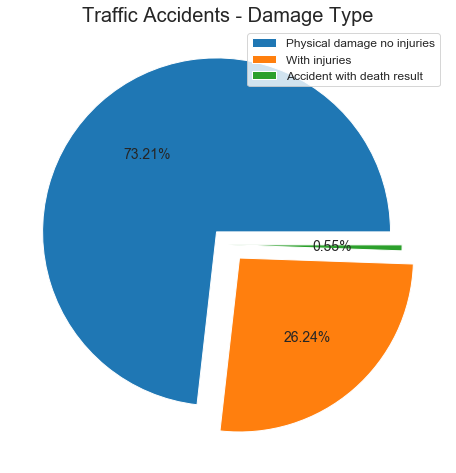

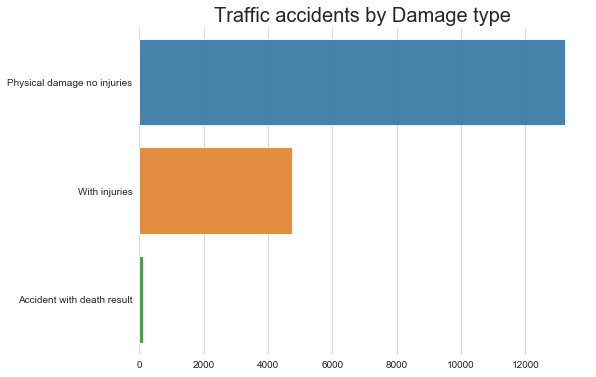

In [13]:
damage_type = vehicle_incidents_serbia.damage_type.value_counts(normalize = True) * 100
d_t = vehicle_incidents_serbia.damage_type.value_counts()

plt.figure(figsize=(8,8))
plt.pie(damage_type,
       #labels = damage_type.index,
       autopct = '%.2f%%',
        explode = [0.1, 0.1,0],
        textprops={'fontsize': 14}
       )
plt.legend(damage_type.index, loc="best", fontsize=12)
plt.title('Traffic Accidents - Damage Type', fontsize=20)
plt.show()

sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.barplot(d_t.values, d_t.index,
           alpha = 0.9)
plt.title("Traffic accidents by Damage type", fontsize = 20)
sns.despine(left = True, bottom = True)
plt.show()

# 3. Heatmap of Traffic Accidents sorted by Months and Weekdays

In [14]:
new = vehicle_incidents_serbia.groupby(['month', 'weekday']).size().unstack()#.sort_values(ascending=False)

z = new[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', "Saturday", 'Sunday']]
z

weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,253,236,240,208,164,186,159
2,221,229,208,197,161,209,204
3,202,196,242,293,297,262,160
4,247,203,197,251,221,225,197
5,225,235,265,273,258,192,157
6,174,166,188,182,262,203,160
7,225,216,173,181,214,150,156
8,220,177,228,257,248,146,181
9,255,202,218,192,219,234,203


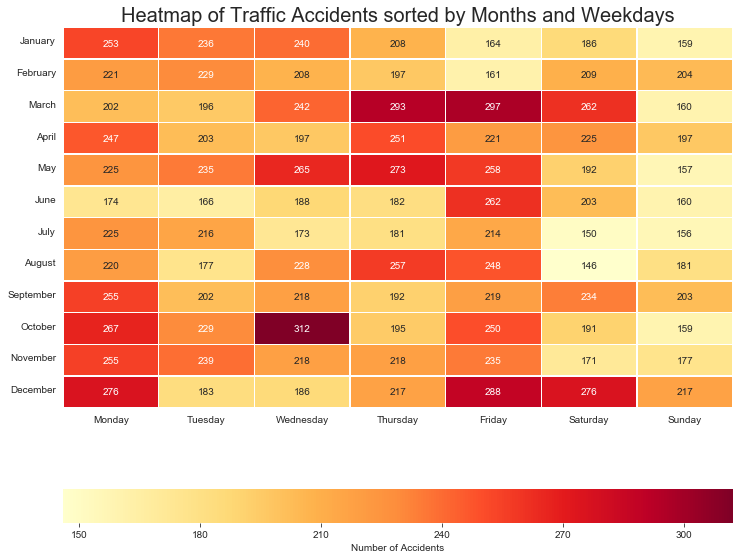

In [15]:


plt.figure(figsize=(12,10))
sns.heatmap(z, annot=True,
            fmt="g",
            cmap='YlOrRd',
            linewidths=.4,
           cbar_kws={'label': 'Number of Accidents', 'orientation': 'horizontal'}
           )
plt.title('Heatmap of Traffic Accidents sorted by Months and Weekdays', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.yticks(np.linspace(0.4, 11.4, 12), calendar.month_name[1:13], rotation=0 )
plt.show()

# 4. Monthly Heatmap of Traffic Accidents By Damage Type

In [16]:
a = vehicle_incidents_serbia.groupby(['month', 'damage_type']).size().unstack()
a = a[['Physical damage no injuries', 'With injuries', 'Accident with death result']]
a

damage_type,Physical damage no injuries,With injuries,Accident with death result
month,,,
1,1082,358,6
2,1047,376,6
3,1229,414,9
4,1094,440,7
5,1141,451,13
6,1017,311,7
7,953,349,13
8,1047,401,9
9,1139,381,3


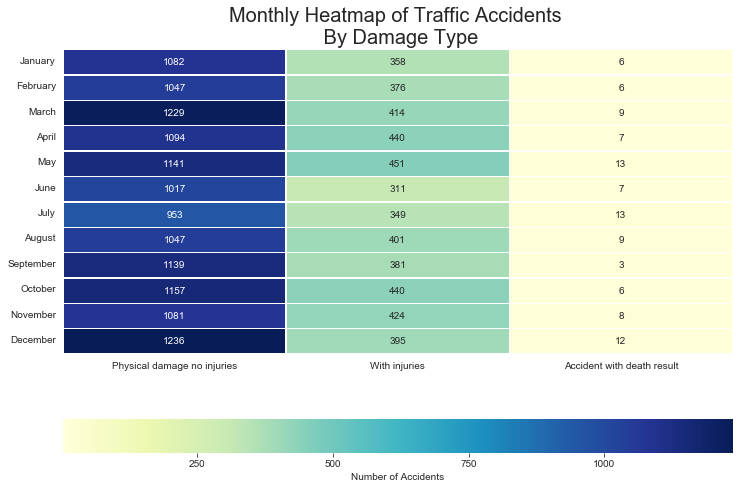

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(a,
           annot=True,
           fmt = 'g',
           cmap = 'YlGnBu',
           linewidth = 0.4,
           cbar_kws={'label': 'Number of Accidents', 'orientation': 'horizontal'}
           )
plt.title('Monthly Heatmap of Traffic Accidents \n By Damage Type', fontsize=20)
plt.xlabel("")
plt.ylabel('')
plt.yticks(np.linspace(0.4, 11.4, 12), labels=calendar.month_name[1:13], rotation = 0)
plt.show()

# 5. Accident types

In [18]:
# Change the name of the values in accident_type column

vehicle_incidents_serbia = vehicle_incidents_serbia.replace({'accident_type' : {'SN SA NAJMANjE DVA VOZILA  BEZ SKRETANjA' : '2+ vehicles involved without changing lanes',
                                                                               'SN SA NAJMANjE DVA VOZILA  SKRETANjE ILI PRELAZAK' : '2+ vehicles involved with changing lanes and turns',
                                                                               'SN SA PARKIRANIM VOZILIMA' : 'Parked vehicle involved',
                                                                               'SN SA JEDNIM VOZILOM' : '1 vehicle involved',
                                                                               'SN SA PEACIMA': 'Pedestrians involved'}})


In [19]:
acc_type = vehicle_incidents_serbia.accident_type.value_counts()

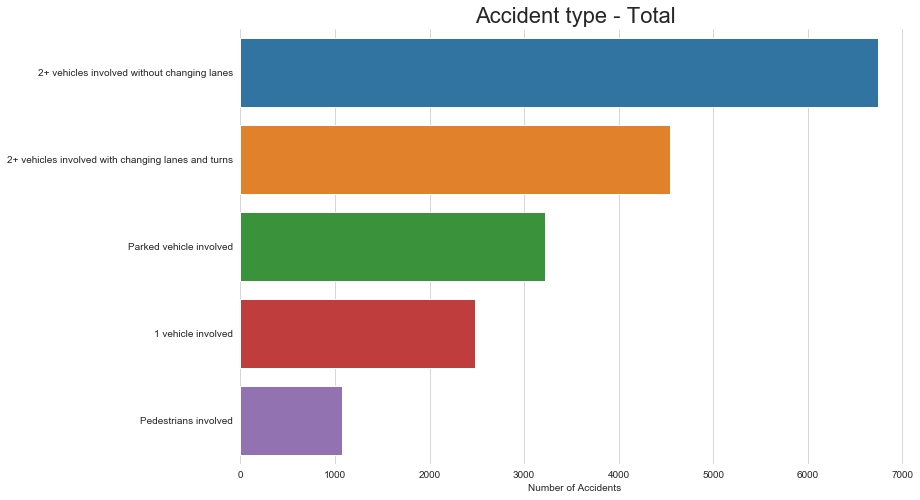

In [20]:
plt.figure(figsize=(12,8))
sns.barplot(acc_type.values, acc_type.index,
           alpha = 1)
plt.title('Accident type - Total', fontsize=22)
plt.xlabel('Number of Accidents')
sns.color_palette("hls", 5)
sns.despine(left=True, right=True, bottom=True)
plt.show()

In [21]:
death_accidents = vehicle_incidents_serbia[vehicle_incidents_serbia.damage_type == 'Accident with death result']
death_accidents.head()

accidents_with_injury = vehicle_incidents_serbia[vehicle_incidents_serbia.damage_type == 'With injuries']



In [22]:
death_accidents.describe()

,id,longitude,latitude,month
count,9.900000e+01,99.000000,99.000000,99.000000
mean,1.222259e+06,20.413552,44.726165,6.686869
std,1.114417e+04,0.129574,0.126489,3.388596
min,1.204151e+06,20.043709,44.311250,1.000000
25%,1.212702e+06,20.318018,44.689391,4.000000
50%,1.222383e+06,20.413950,44.760950,7.000000
75%,1.231576e+06,20.487755,44.810654,10.000000
max,1.241130e+06,20.759392,44.931900,12.000000


In [23]:
#!conda create --name TEST python=3.6 basemap
#!conda activate TEST
#!python -c "from mpl_toolkits.basemap import Basemap"
#!y

In [24]:
#import mpl_toolkits
#mpl_toolkits.__path__.append('/usr/lib/python2.7/dist-packages/mpl_toolkits/')
from mpl_toolkits.basemap import Basemap

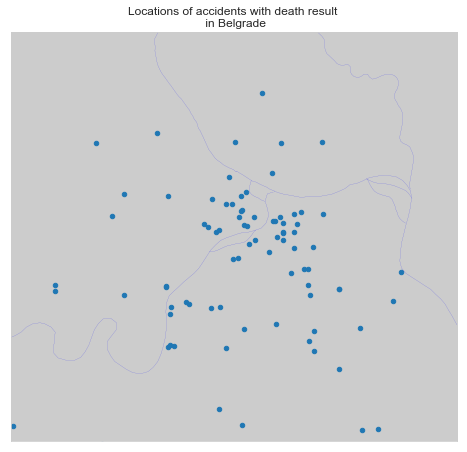

In [43]:
m = Basemap(projection="merc",llcrnrlat=44.60, urcrnrlat=44.99, llcrnrlon=20.10, urcrnrlon=20.70, resolution='f')

a,b = m(accidents_with_injury["longitude"].tolist(), accidents_with_injury["latitude"].tolist())
x, y = m(death_accidents["longitude"].tolist(), death_accidents["latitude"].tolist())

plt.figure(figsize=(8,10))
m.scatter(x, y, s=20)
#m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='blue', linewidth=.1)
m.drawcountries(linewidth=0.4)
m.shadedrelief()
#m.bluemarble()
#m.etopo()
m.drawlsmask()
plt.title('Locations of accidents with death result \n in Belgrade')
plt.show()


In [26]:
conda install basemap-data-hires

Solving environment: done

## Package Plan ##

  environment location: /Users/markouskokovic/anaconda3

  added / updated specs:
    - basemap-data-hires


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    basemap-data-hires-1.2.0   |                0       105.3 MB
    ------------------------------------------------------------
                                           Total:       105.3 MB

The following NEW packages will be INSTALLED:

  basemap-data-hires pkgs/main/osx-64::basemap-data-hires-1.2.0-0



basemap-data-hires-1 | 105.3 MB  | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.
